In [609]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

In [610]:
#Pool image 

img = cv2.imread('rov_pool.jpg')

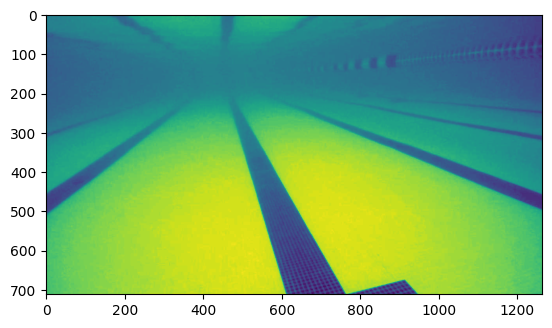

In [611]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)


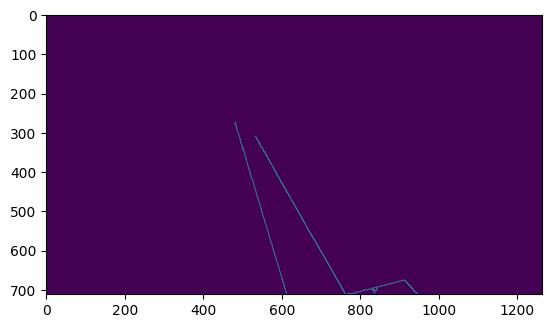

In [612]:
edges = cv2.Canny(gray, 27, 175, apertureSize=3) # detect edges
plt.imshow(edges)


In [613]:
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=30,
        ) # detect lines

In [614]:
lineData = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2 - y1)/(x2 - x1)
    xInt = ((slope * x1) - y1) / slope
    lineData.append([slope, xInt, x1, y1, x2, y2])

In [615]:
cleanedLines = []
for line in lineData:
    canAdd = True
    for cleanedLine in cleanedLines:
        if abs(cleanedLine[1] - line[1]) < 3:
            canAdd = False
        
    if canAdd:
        cleanedLines.append(line)

In [616]:
for line in cleanedLines:
    x1 = line[2]
    y1 = line[3]
    x2 = line[4]
    y2 = line[5]
    print (x1, y1, x2, y2)
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

579 393 762 710
481 279 612 708


2


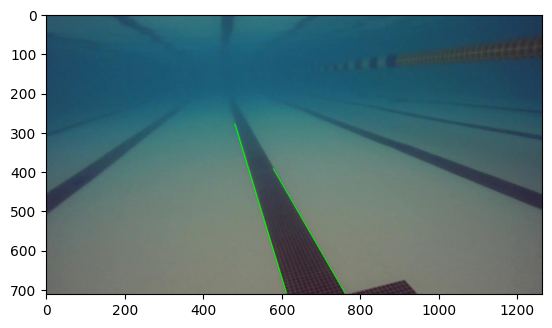

In [617]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [618]:
#Picture with line

img = cv2.imread('image.jpg')


In [619]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines


In [620]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)


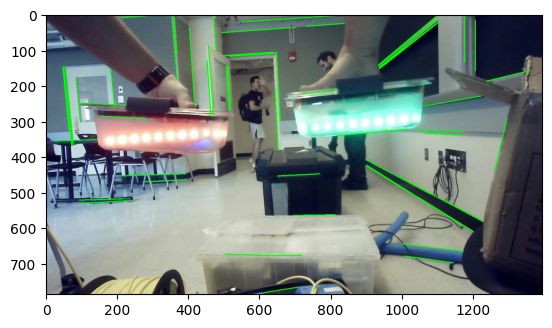

In [621]:
plt.imshow(img)

In [622]:
#Black and White Practice

img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)


In [623]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)


In [624]:
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)


In [625]:
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))

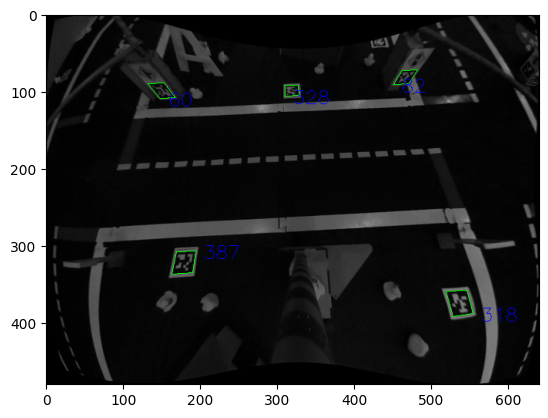

In [626]:
plt.imshow(color_img)